In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pycountry_convert
import pycountry_convert as pc

     |████████████████████████████████| 10.1MB 28.2MB/s eta 0:00:01
     |████████████████████████████████| 286kB 42.2MB/s eta 0:00:01
     |████████████████████████████████| 215kB 80.6MB/s eta 0:00:01
     |████████████████████████████████| 102kB 50.1MB/s ta 0:00:01
     |████████████████████████████████| 61kB 39.9MB/s eta 0:00:01
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595765 sha256=22ddeff20f89fcb9e53c10ea76b49b22c13e69906c6337d907645742c323810e
  Stored in directory: /home/jovyan/.cache/pip/wheels/95/98/2e/d24621de79da77006d0c34553a2675f6b7ac9c061b8b2009dd
Successfully built pycountry
  Found existing installation: attrs 19.1.0
    Uninstalling attrs-19.1.0:
      Successfully uninstalled attrs-19.1.0


In [3]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

### 1. Take a look at the data

In [4]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,5931,6023,6023,6442,6524,6558,6558,6558,6627,6627
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,7862536,7940657,8041520,8130023,8207752,8271636,8313614,8335184,8378656,8427778
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,351711,352399,353731,355662,358218,361754,364348,366433,367795,370922
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,31366,31941,33071,33933,34418,34976,35520,36031,36474,37023
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,975564,994277,1015495,1033364,1083622,1103219,1121481,1139787,1086483,1098290


In [5]:
confirmed[~confirmed['Province/State'].isna()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,31366,31941,33071,33933,34418,34976,35520,36031,36474,37023
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,975564,994277,1015495,1033364,1083622,1103219,1121481,1139787,1086483,1098290
10,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,9645,9702,10721,11355,12309,18916,21764,23189,24311,25512
11,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,325150,344844,358336,369936,369807,390106,402656,406129,417689,427319
12,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,100028,103175,104550,109555,110332,115298,117002,118967,120233,121956
13,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,25282,25884,26604,27356,27983,28684,29319,29946,30645,31311
14,Victoria,Australia,-37.813600,144.963100,0,0,0,0,1,1,...,760683,775888,789827,804121,817360,830604,841276,851689,863000,877553
15,Western Australia,Australia,-31.950500,115.860500,0,0,0,0,0,0,...,1386,1415,1442,1442,1454,1462,1505,1504,1551,1568
39,Alberta,Canada,53.933300,-116.576500,0,0,0,0,0,0,...,466616,466616,477841,477841,484400,487436,487436,487436,493973,495953
40,British Columbia,Canada,53.726700,-127.647600,0,0,0,0,0,0,...,308079,308079,314787,314787,318906,320540,320540,320540,324615,325851


### 2. Construct infection dynamics graphs

In [6]:
confirmed1 = confirmed.groupby('Country/Region').sum().T.iloc[2:, :]

In [7]:
confirmed1.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [8]:
confirmed1['Total'] = confirmed1.sum(axis=1)

In [9]:
confirmed1.index = pd.to_datetime(confirmed1.index)

In [10]:
confirmed1.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Total
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,557.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,655.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,941.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1434.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2118.0


In [11]:
confirmed1['Total']

2020-01-22          557.0
2020-01-23          655.0
2020-01-24          941.0
2020-01-25         1434.0
2020-01-26         2118.0
                 ...     
2022-01-28    369952391.0
2022-01-29    372549524.0
2022-01-30    374778211.0
2022-01-31    378331011.0
2022-02-01    381683860.0
Name: Total, Length: 742, dtype: float64

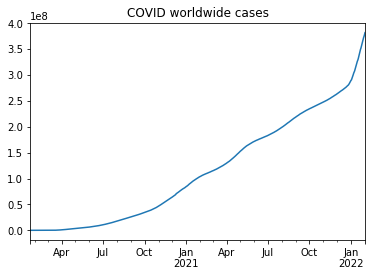

In [12]:
confirmed1['Total'].plot(
    kind='line',
    title='COVID worldwide cases'
    
)
plt.show()

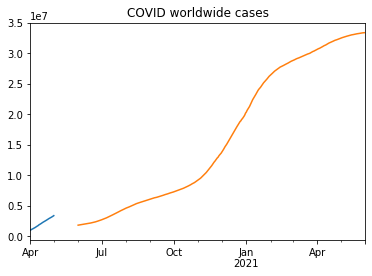

In [13]:
confirmed1['Total']['2020-04-01':'2020-05-01'].plot(
    kind='line',
    title='COVID worldwide cases'
    ,
)
confirmed1['US']['2020-06-01':'2021-06-01'].plot(
    kind='line'
)
plt.show()

### 3. Let's build graphs of the dynamics of the increase in infections

In [14]:
confirmed1_change = confirmed1 - confirmed1.shift().fillna(0)

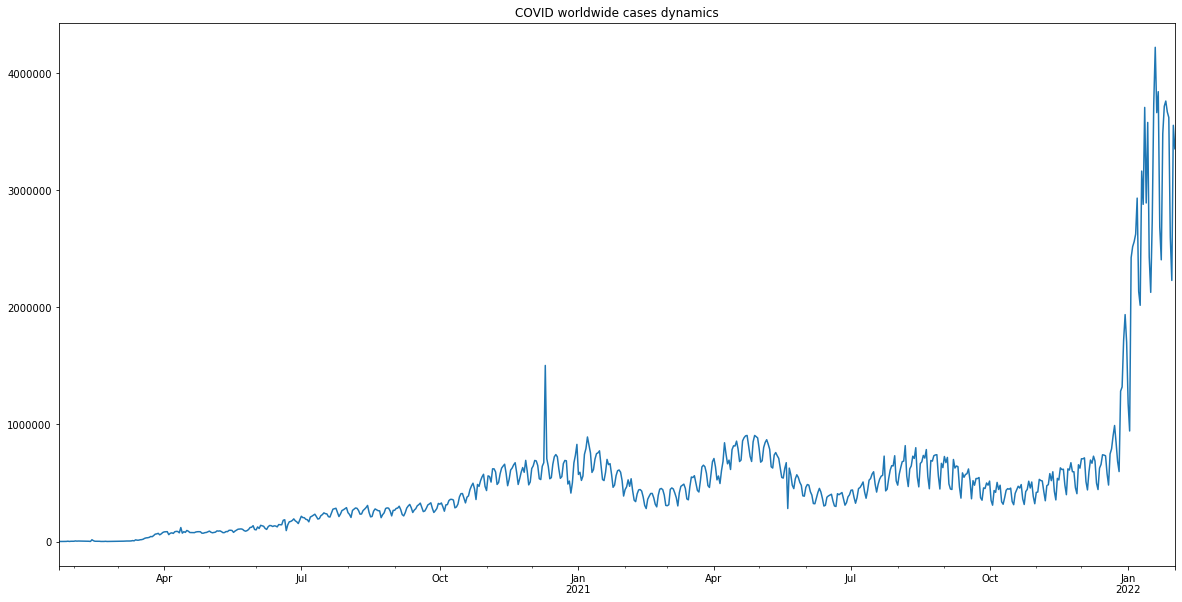

In [15]:
confirmed1_change['Total'].plot(
    kind='line',
    title='COVID worldwide cases dynamics',
    figsize=(20, 10)
)
plt.show()

### 4. Find the top 20 countries by number of infections

In [16]:
top20_names = confirmed1.iloc[-1, :].sort_values(ascending=False)[1:21].index.to_list()
top20_names

['US',
 'India',
 'Brazil',
 'France',
 'United Kingdom',
 'Russia',
 'Turkey',
 'Italy',
 'Germany',
 'Spain',
 'Argentina',
 'Iran',
 'Colombia',
 'Mexico',
 'Poland',
 'Netherlands',
 'Indonesia',
 'Ukraine',
 'South Africa',
 'Philippines']

In [17]:
top20 = confirmed1[top20_names].iloc[-1, :].sort_values()
top20

Country/Region
Philippines        3569665.0
South Africa       3608307.0
Ukraine            4287117.0
Indonesia          4353370.0
Netherlands        4625059.0
Poland             4925270.0
Mexico             4985689.0
Colombia           5901715.0
Iran               6408244.0
Argentina          8427778.0
Spain             10039126.0
Germany           10236740.0
Italy             11116422.0
Turkey            11722483.0
Russia            11795059.0
United Kingdom    17544380.0
France            19681231.0
Brazil            25634781.0
India             41630885.0
US                75350359.0
Name: 2022-02-01 00:00:00, dtype: float64

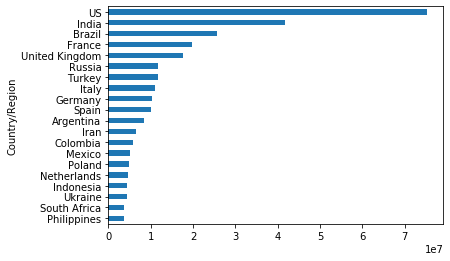

In [18]:
top20.plot(kind='barh')
plt.show()

### 5. Let's show how the dynamics of the top 20 countries has changed over time

In [19]:
confirmed1.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Total
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,557.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,655.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,941.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1434.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2118.0


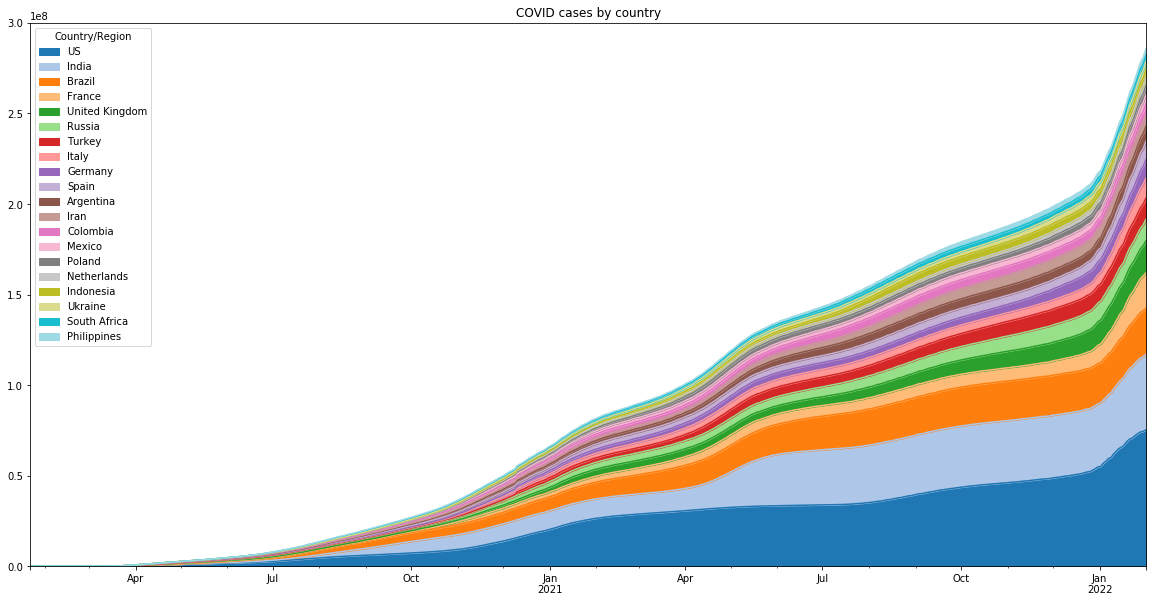

In [20]:
confirmed1[top20_names].plot(kind='area',
                             figsize=(20, 10),
                             colormap='tab20',
                             title='COVID cases by country'
                            )
plt.show()

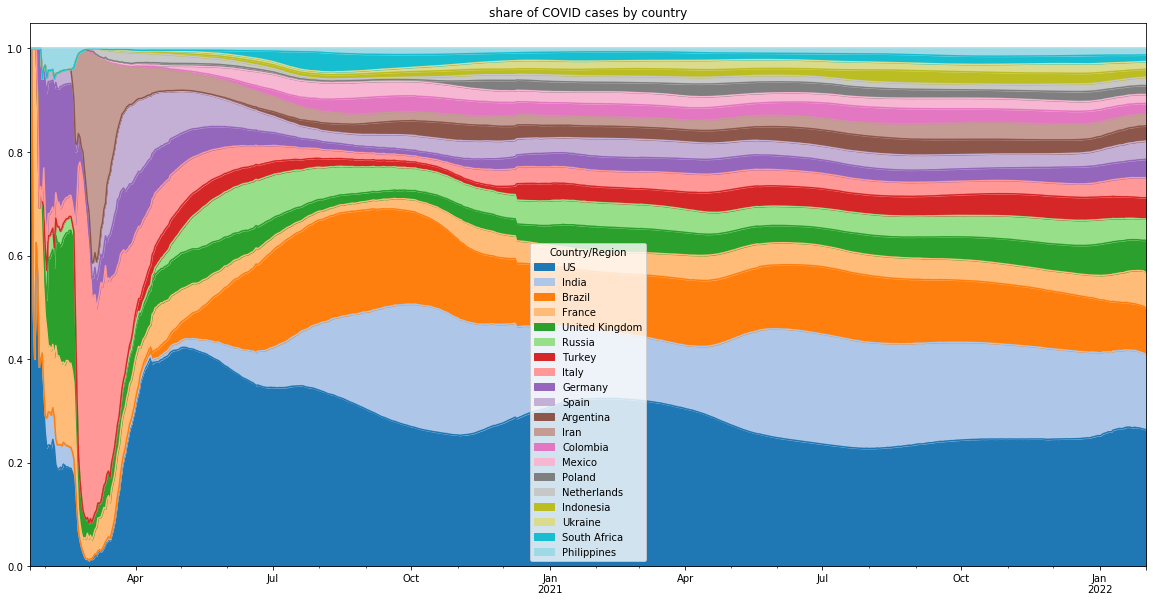

In [21]:
confirmed1[top20_names].divide(confirmed1[top20_names].sum(axis=1), axis=0).plot(
    kind='area',
    figsize=(20, 10),
    colormap='tab20',
    title='share of COVID cases by country'
)
plt.show()

### 6. Check if there is a correlation in the dynamics of cases in countries located close to each other

In [22]:
confirmed1_change[top20_names]

Country/Region,US,India,Brazil,France,United Kingdom,Russia,Turkey,Italy,Germany,Spain,Argentina,Iran,Colombia,Mexico,Poland,Netherlands,Indonesia,Ukraine,South Africa,Philippines
2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-31,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        return continent_name
    except:
        return 'UNKNOWN'

In [24]:
get_continent('US')

'UNKNOWN'

In [25]:
[get_continent(i) + '-' + i for i in top20_names]

['UNKNOWN-US',
 'AS-India',
 'SA-Brazil',
 'EU-France',
 'EU-United Kingdom',
 'EU-Russia',
 'AS-Turkey',
 'EU-Italy',
 'EU-Germany',
 'EU-Spain',
 'SA-Argentina',
 'AS-Iran',
 'SA-Colombia',
 'NA-Mexico',
 'EU-Poland',
 'EU-Netherlands',
 'AS-Indonesia',
 'EU-Ukraine',
 'AF-South Africa',
 'AS-Philippines']

In [26]:
cc20 = confirmed1_change[top20_names]

In [27]:
cc20.columns = [get_continent(i) + '-' + i for i in cc20.columns]

In [28]:
c = cc20.corr().sort_index().sort_index(axis=1)

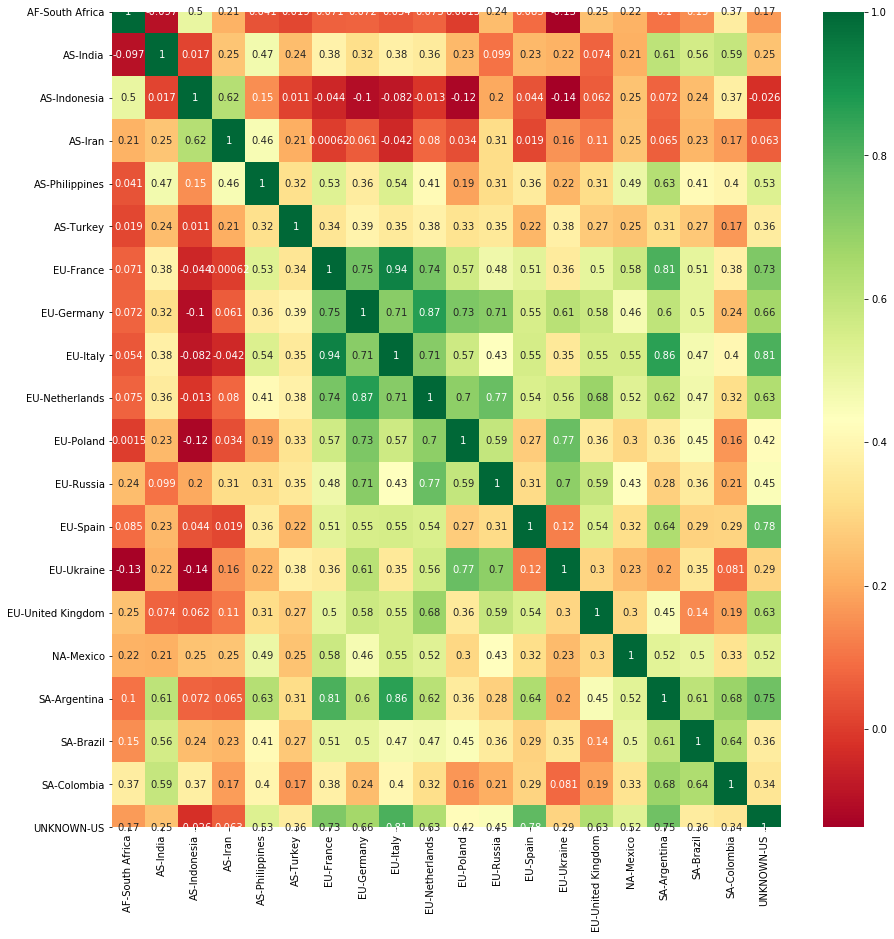

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(c, annot=True, cmap='RdYlGn')
plt.show()